# Getting started with prtecan

In [1]:
import hashlib
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from clophfit import prtecan

%load_ext autoreload
%autoreload 2

os.chdir("../../tests/Tecan/140220/")

## To parse a Tecan file

In [2]:
tf = prtecan.Tecanfile("../290212_6.38.xls")
tf.__dict__

{'path': '../290212_6.38.xls',
 'metadata': {'Device: infinite 200': Metadata(value='Serial number: 810002712', unit=['Serial number of connected stacker:']),
  'Firmware: V_2.11_04/08_InfiniTe (Apr  4 2008/14.37.11)': Metadata(value='MAI, V_2.11_04/08_InfiniTe (Apr  4 2008/14.37.11)', unit=None),
  'Date:': Metadata(value='29/02/2012', unit=None),
  'Time:': Metadata(value='15.57.05', unit=None),
  'System': Metadata(value='TECANROBOT', unit=None),
  'User': Metadata(value='TECANROBOT\\Administrator', unit=None),
  'Plate': Metadata(value='PE 96 Flat Bottom White   [PE.pdfx]', unit=None),
  'Plate-ID (Stacker)': Metadata(value='Plate-ID (Stacker)', unit=None),
  'Shaking (Linear) Duration:': Metadata(value=50, unit=['s']),
  'Shaking (Linear) Amplitude:': Metadata(value=2, unit=['mm'])},
 'labelblocks': [Labelblock(path='../290212_6.38.xls', metadata={'Label': Metadata(value='Label1', unit=None), 'Mode': Metadata(value='Fluorescence Top Reading', unit=None), 'Excitation Wavelength': M

When KEYS are identical labelblocks are considered __eq__ equal i.e. they contain the same measurement.

In [3]:
tf.labelblocks[0].metadata

{'Label': Metadata(value='Label1', unit=None),
 'Mode': Metadata(value='Fluorescence Top Reading', unit=None),
 'Excitation Wavelength': Metadata(value=400, unit=['nm']),
 'Emission Wavelength': Metadata(value=535, unit=['nm']),
 'Excitation Bandwidth': Metadata(value=20, unit=['nm']),
 'Emission Bandwidth': Metadata(value=25, unit=['nm']),
 'Gain': Metadata(value=81, unit=['Manual']),
 'Number of Flashes': Metadata(value=10, unit=None),
 'Integration Time': Metadata(value=20, unit=['µs']),
 'Lag Time': Metadata(value=0, unit=['µs']),
 'Settle Time': Metadata(value=0, unit=['ms']),
 'Start Time:': Metadata(value='29/02/2012 15.57.55', unit=None),
 'Temperature': Metadata(value=26.0, unit=['°C']),
 'End Time:': Metadata(value='29/02/2012 15.58.35', unit=None)}

In [4]:
print(tf.labelblocks[0].data)

{'A01': 30072.0, 'A02': 27276.0, 'A03': 22249.0, 'A04': 30916.0, 'A05': 27943.0, 'A06': 25130.0, 'A07': 26765.0, 'A08': 27836.0, 'A09': 23084.0, 'A10': 31370.0, 'A11': 16890.0, 'A12': 22136.0, 'B01': 22336.0, 'B02': 31327.0, 'B03': 24855.0, 'B04': 32426.0, 'B05': 30066.0, 'B06': 27018.0, 'B07': 28269.0, 'B08': 27570.0, 'B09': 31310.0, 'B10': 24358.0, 'B11': 22595.0, 'B12': 20355.0, 'C01': 23232.0, 'C02': 32241.0, 'C03': 28309.0, 'C04': 26642.0, 'C05': 28818.0, 'C06': 26638.0, 'C07': 26423.0, 'C08': 29441.0, 'C09': 28541.0, 'C10': 29656.0, 'C11': 29841.0, 'C12': 25738.0, 'D01': 26578.0, 'D02': 22280.0, 'D03': 36219.0, 'D04': 25735.0, 'D05': 35433.0, 'D06': 27376.0, 'D07': 22497.0, 'D08': 35681.0, 'D09': 26154.0, 'D10': 32311.0, 'D11': 27495.0, 'D12': 22459.0, 'E01': 27576.0, 'E02': 26058.0, 'E03': 28882.0, 'E04': 26188.0, 'E05': 27531.0, 'E06': 31269.0, 'E07': 26757.0, 'E08': 26427.0, 'E09': 27764.0, 'E10': 27184.0, 'E11': 26556.0, 'E12': 18494.0, 'F01': 22120.0, 'F02': 26642.0, 'F03': 

## To group list of files into a titration

In [8]:
tit = prtecan.Titration.fromlistfile("../list.pH")

In [9]:
tit.__dict__

{'tecanfiles': [Tecanfile(path=PosixPath('../290212_5.78.xls'), metadata={'Device: infinite 200': Metadata(value='Serial number: 810002712', unit=['Serial number of connected stacker:']), 'Firmware: V_2.11_04/08_InfiniTe (Apr  4 2008/14.37.11)': Metadata(value='MAI, V_2.11_04/08_InfiniTe (Apr  4 2008/14.37.11)', unit=None), 'Date:': Metadata(value='29/02/2012', unit=None), 'Time:': Metadata(value='16.05.07', unit=None), 'System': Metadata(value='TECANROBOT', unit=None), 'User': Metadata(value='TECANROBOT\\Administrator', unit=None), 'Plate': Metadata(value='PE 96 Flat Bottom White   [PE.pdfx]', unit=None), 'Plate-ID (Stacker)': Metadata(value='Plate-ID (Stacker)', unit=None), 'Shaking (Linear) Duration:': Metadata(value=50, unit=['s']), 'Shaking (Linear) Amplitude:': Metadata(value=2, unit=['mm'])}, labelblocks=[Labelblock(path=PosixPath('../290212_5.78.xls'), metadata={'Label': Metadata(value='Label1', unit=None), 'Mode': Metadata(value='Fluorescence Top Reading', unit=None), 'Excitat

In [58]:
tit.labelblocksgroups[0].labelblocks[0].metadata["Temperature"], tit.labelblocksgroups[
    1
].labelblocks[0].metadata["Temperature"]

(Metadata(value=25.9, unit=['°C']), Metadata(value=26.2, unit=['°C']))

In [59]:
tit.labelblocksgroups[0].metadata

{'Label': Metadata(value='Label1', unit=None),
 'Mode': Metadata(value='Fluorescence Top Reading', unit=None),
 'Excitation Wavelength': Metadata(value=400, unit=['nm']),
 'Emission Wavelength': Metadata(value=535, unit=['nm']),
 'Excitation Bandwidth': Metadata(value=20, unit=['nm']),
 'Emission Bandwidth': Metadata(value=25, unit=['nm']),
 'Number of Flashes': Metadata(value=10, unit=None),
 'Integration Time': Metadata(value=20, unit=['µs']),
 'Lag Time': Metadata(value=0, unit=['µs']),
 'Settle Time': Metadata(value=0, unit=['ms']),
 'Gain': Metadata(value=81, unit=None)}

In [60]:
tit.labelblocksgroups[1].metadata

{'Label': Metadata(value='Label2', unit=None),
 'Mode': Metadata(value='Fluorescence Top Reading', unit=None),
 'Excitation Wavelength': Metadata(value=485, unit=['nm']),
 'Emission Wavelength': Metadata(value=535, unit=['nm']),
 'Excitation Bandwidth': Metadata(value=25, unit=['nm']),
 'Emission Bandwidth': Metadata(value=25, unit=['nm']),
 'Number of Flashes': Metadata(value=10, unit=None),
 'Integration Time': Metadata(value=20, unit=['µs']),
 'Lag Time': Metadata(value=0, unit=['µs']),
 'Settle Time': Metadata(value=0, unit=['ms']),
 'Movement': Metadata(value='Move Plate Out', unit=None),
 'Gain': Metadata(value=93, unit=None)}

In [16]:
tit.labelblocksgroups[0].data["A01"], tit.labelblocksgroups[0].data["H12"]

([30344.0, 30072.0, 31010.0, 32678.0, 33731.0, 36506.0, 37967.0, 37725.0],
 [21287.0, 20888.0, 21209.0, 21711.0, 22625.0, 23397.0, 24791.0, 25045.0])

## pH titration analysis

In [26]:
ph = prtecan.Titration.fromlistfile("list.pH")

/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfile pH7.6_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfile pH7.1_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:A06 of tecanfile pH6.5_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfile pH6.5_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:A06 of tecanfile pH5.8_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfile pH5.8_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfil

In [36]:
ph_an = prtecan.TitrationAnalysis.fromlistfile("./list.pH")
ph_an.load_scheme("./scheme.txt")
print(ph_an.scheme)
ph_an.labelblocksgroups[1].data["D01"]

PlateScheme(file='./scheme.txt', buffer=['D01', 'E01', 'D12', 'E12'], ctrl=['B01', 'C12', 'H12', 'F12', 'B12', 'F01', 'C01', 'G12', 'G01', 'A01', 'H01', 'A12'], names={'G03': {'B12', 'H12', 'A01'}, 'NTT': {'C12', 'F12', 'F01'}, 'S202N': {'H01', 'C01', 'G12'}, 'V224Q': {'A12', 'G01', 'B01'}})


/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfile pH7.6_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfile pH7.1_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:A06 of tecanfile pH6.5_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfile pH6.5_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:A06 of tecanfile pH5.8_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfile pH5.8_200214.xls
  warnings.warn(
/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfil

[51.0, 52.0, 50.0, 51.0, 55.0, 58.0, 57.0]

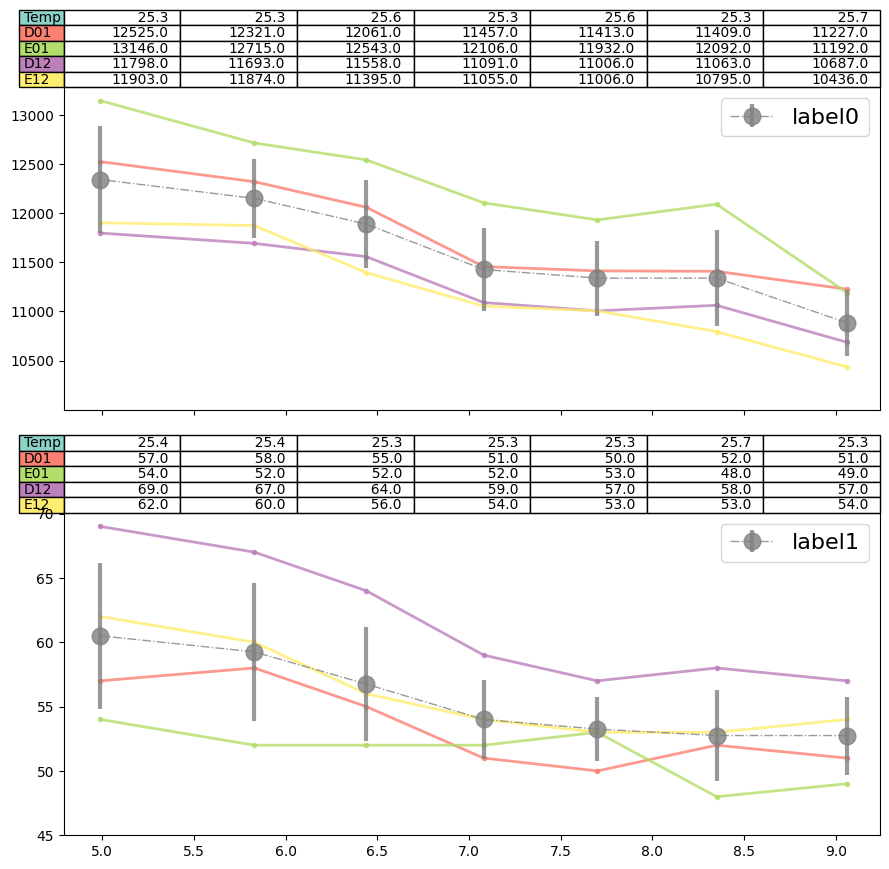

In [38]:
g = ph_an.plot_buffer()

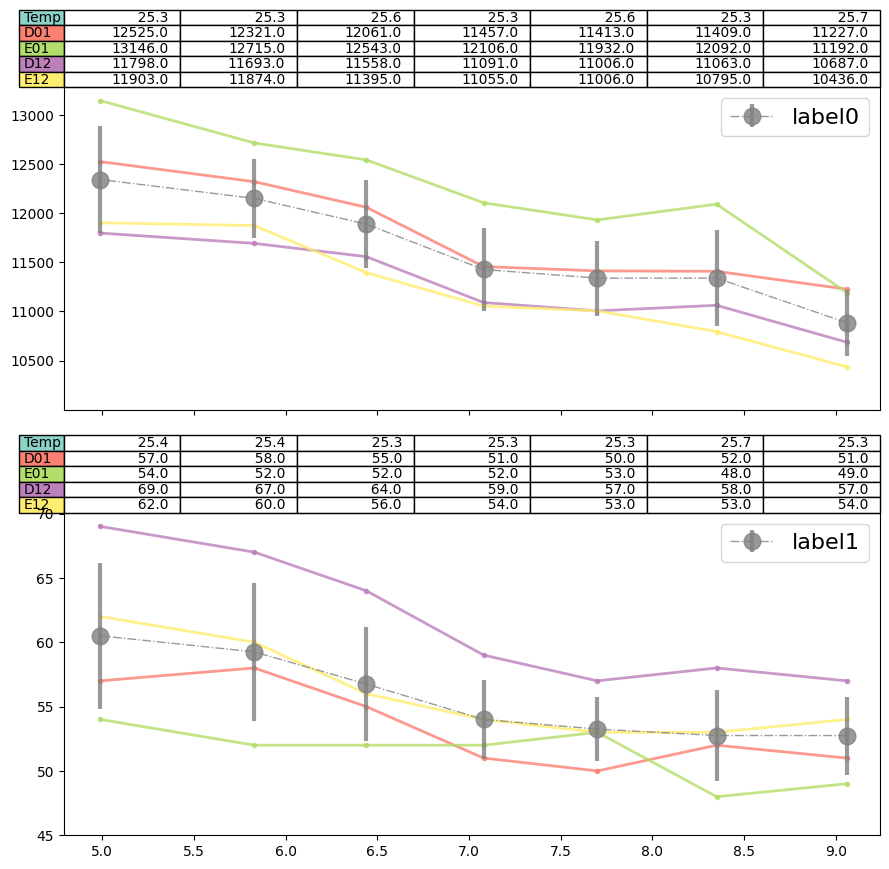

In [40]:
ph_an.load_additions("additions.pH")
g = ph_an.plot_buffer()

In [56]:
ph_an.data_dilutioncorrected_norm[1]["D11"]

array([188.50446429, 146.82991071,  72.77678571,  32.84107143,
        16.89910714,  13.234375  ,  10.65      ])

## Cl titration analysis

In [104]:
cl_an = prtecan.TitrationAnalysis.fromlistfile("list.cl")
cl_an.load_scheme("scheme.txt")
print(cl_an.scheme)
cl_an.load_additions("additions.cl")

PlateScheme(file='scheme.txt', buffer=['D01', 'E01', 'D12', 'E12'], ctrl=['B01', 'C12', 'H12', 'F12', 'B12', 'F01', 'C01', 'G12', 'G01', 'A01', 'H01', 'A12'], names={'G03': {'B12', 'H12', 'A01'}, 'NTT': {'C12', 'F12', 'F01'}, 'S202N': {'H01', 'C01', 'G12'}, 'V224Q': {'A12', 'G01', 'B01'}})


/home/dan/workspace/ClopHfit/src/clophfit/prtecan.py:503: UserWarning: OVER
 Overvalue in Label1:H02 of tecanfile pH5.0_200214.xls
  warnings.warn(


In [105]:
print(cl_an.conc)
cl_an.conc = prtecan.calculate_conc(cl_an.additions, 1000)
cl_an.conc

[0, 0, 0, 0, 0, 0, 0, 0, 0]


array([  0.        ,  17.54385965,  34.48275862,  50.84745763,
        66.66666667,  81.96721311,  96.77419355, 138.46153846,
       164.17910448])

In [103]:
lbg.labelblocks[1]
.buffer

12629.0

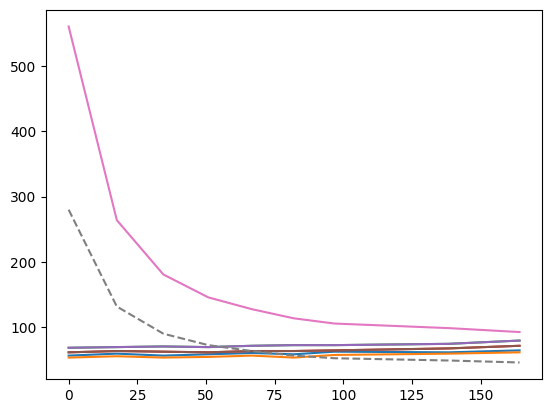

In [108]:
lbg = cl_an.labelblocksgroups[1]
x = cl_an.conc
plt.plot(x, lbg.data["D01"])
plt.plot(x, lbg.data["E01"])
plt.plot(x, lbg.data["D12"])
plt.plot(x, lbg.data["E12"])
plt.plot(x, cl_an.labelblocksgroups[1].data["D12"])
plt.plot(x, cl_an.labelblocksgroups[1].data["E12"])
plt.plot(x, lbg.data["A11"])
plt.plot(x, np.array(cl_an.labelblocksgroups[1].data["A11"]) / 2, "--")

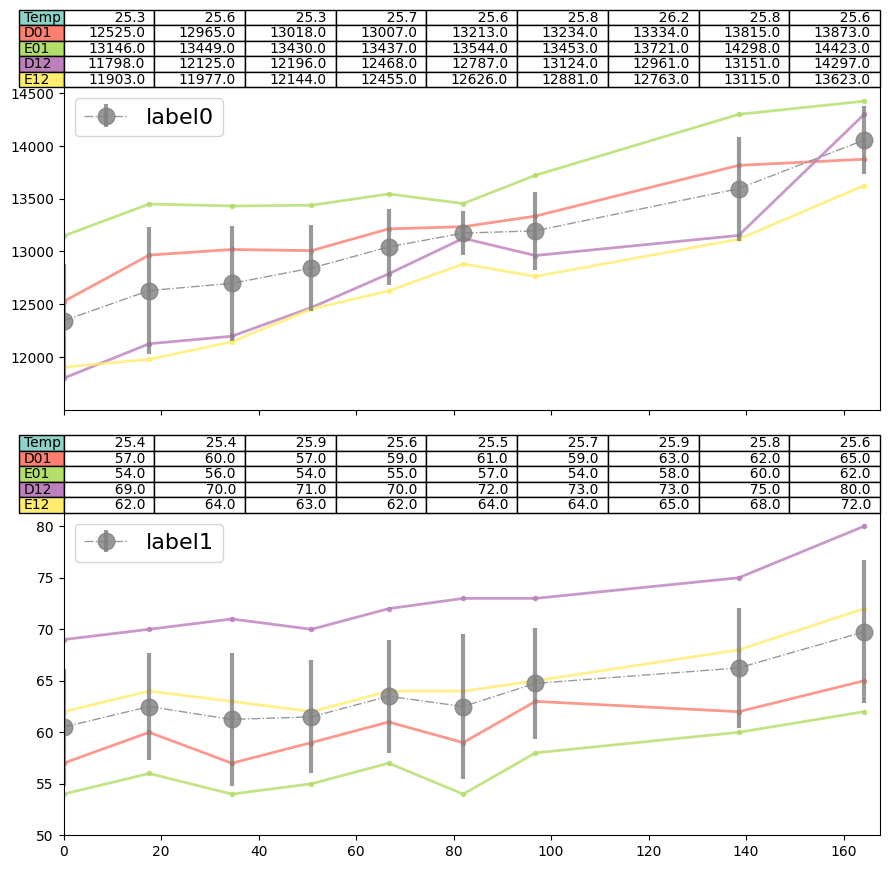

In [111]:
f = cl_an.plot_buffer()

## Fitting

TitrationAnalysis class need API changes to better rationalize its use.

In [113]:
ph_an.fit("pH", fin=-1, tval=0.95)
type(ph_an.fittings)

list

In [114]:
# ph_an.fittings[1].to_csv('fit1-1.csv')
ph_an.fittings[1]

,ss,msg,df,tval,chisqr,K,SA,SB,sK,sSA,sSB,ctrl
C07,1,Both actual and predicted relative reductions ...,3,3.182446,531.391701,6.998599,679.117055,4562.446302,0.043129,84.471666,54.212254,NaN
C11,1,Both actual and predicted relative reductions ...,3,3.182446,733.441176,6.914068,539.702309,2639.308741,0.096254,106.820103,61.850715,NaN
B10,1,Both actual and predicted relative reductions ...,3,3.182446,11773.765769,6.963856,1063.906280,5669.361999,0.172949,409.440304,252.070716,NaN
F03,1,Both actual and predicted relative reductions ...,3,3.182446,13.456577,7.966524,135.586744,1521.217494,0.019661,8.111441,14.721964,NaN
B04,1,Both actual and predicted relative reductions ...,3,3.182446,8397.897208,6.970078,1213.382835,8230.658542,0.095679,343.952465,213.350199,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
H10,1,Both actual and predicted relative reductions ...,3,3.182446,805.500583,8.088479,214.626089,3205.618147,0.073485,60.318319,127.094321,NaN
A03,1,Both actual and predicted relative reductions ...,3,3.182446,9449.315918,7.092231,1569.680506,10026.843603,0.081637,331.163432,236.702984,NaN
D11,1,Both actual and predicted relative reductions ...,3,3.182446,407.829011,8.044254,178.755215,2366.026233,0.070358,43.526911,86.780387,NaN
E09,1,Both actual and predicted relative reductions ...,3,3.182446,425.668116,8.018927,127.218785,2047.819450,0.081149,44.835392,86.656800,NaN


In [115]:
ph_an.fittings[1].loc[["H06", "A01"]]

,ss,msg,df,tval,chisqr,K,SA,SB,sK,sSA,sSB,ctrl
H06,1,Both actual and predicted relative reductions ...,3,3.182446,85.730623,8.044499,583.667709,9807.482415,0.007650,19.955025,39.796818,NaN
A01,1,Both actual and predicted relative reductions ...,3,3.182446,1912.411207,7.939952,308.491030,5053.296317,0.067897,97.573993,171.649842,G03


In [116]:
key = "H06"
lbg = ph_an.labelblocksgroups[1]
x = ph_an.conc
y = lbg.data[key]
dd = prtecan.fit_titration("pH", x[:-1], y[:-1])
dd

,ss,msg,df,tval,chisqr,K,SA,SB,sK,sSA,sSB
0,1,Both actual and predicted relative reductions ...,3,3.182446,85.730623,8.044499,583.667709,9807.482415,0.00765,19.955025,39.796818


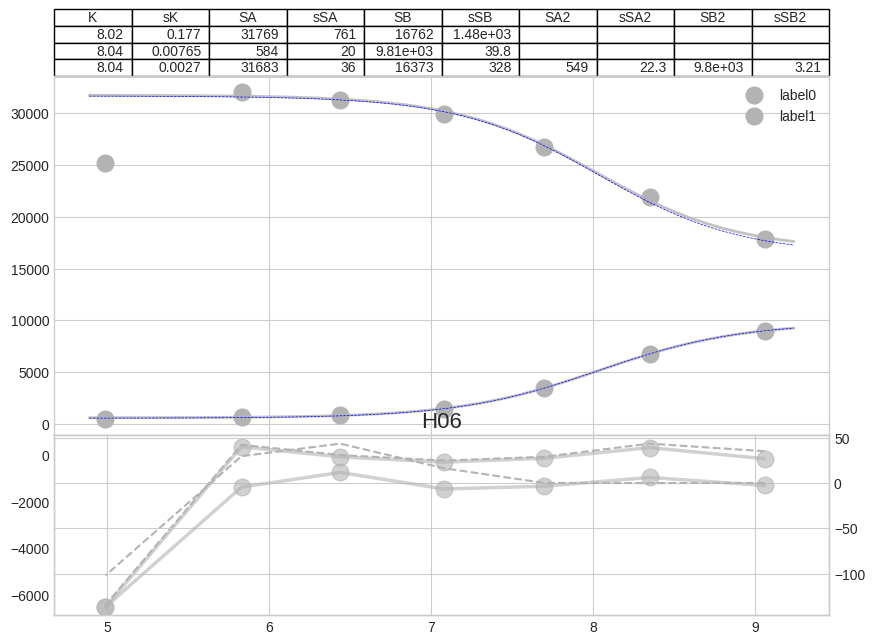

In [117]:
ph_an.plot_well("H06")

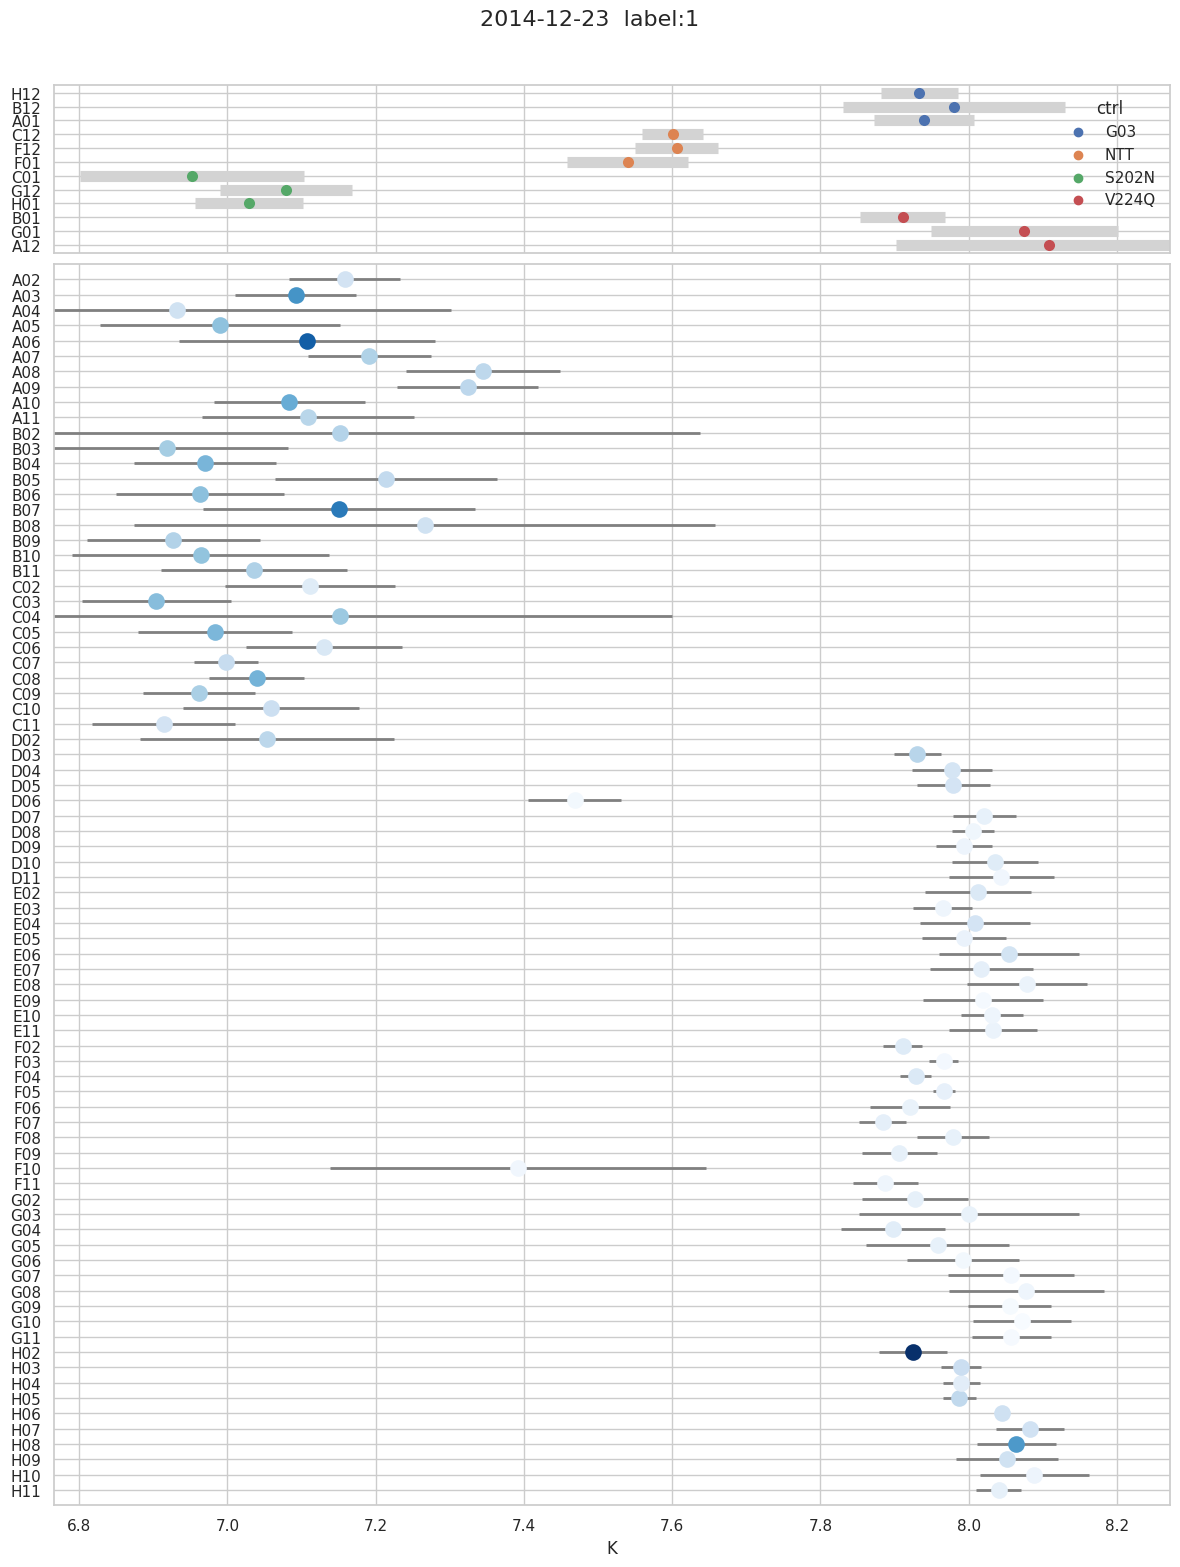

In [118]:
f = ph_an.plot_k(1, title="2014-12-23")

In [119]:
cl_an.fit("Cl", fin=None)

In [120]:
cl_an.plot_all_wells("cl.pdf")

In [121]:
ph_an.print_fitting(2)

          K      sK      SA     sSA      SB     sSB     SA2    sSA2     SB2    sSB2
  G03
H12    7.71    0.02   23432     236   14741      11     353      81    5584     146 
B12    8.15    0.03   18666      77   14000      33     522    1640    2845     331 
A01    8.12    0.07   22500     318   13976     400     624     277    5215     257 
  NTT
C12    7.80    0.11   22069     648   14721     575     957     294    2554      26 
F12    7.72    0.09   23474     567   15716     613     586     253    2842      55 
F01    7.64    0.04   47972      33   23856     375    1573    1038    7997      54 
  S202N
C01    7.39    0.30   43803     220   30991    1494    3709    2136    7038     390 
G12    7.34    0.15   22702     346   16628     178     817     189    2384     141 
H01    7.15    0.00   36727       0   24994       8    1197    1081    5148      14 
  V224Q
B01    8.00    0.03   40086     263   23554     346    1523     900   15426      91 
G01    8.19    0.03   42427     521   

### selection

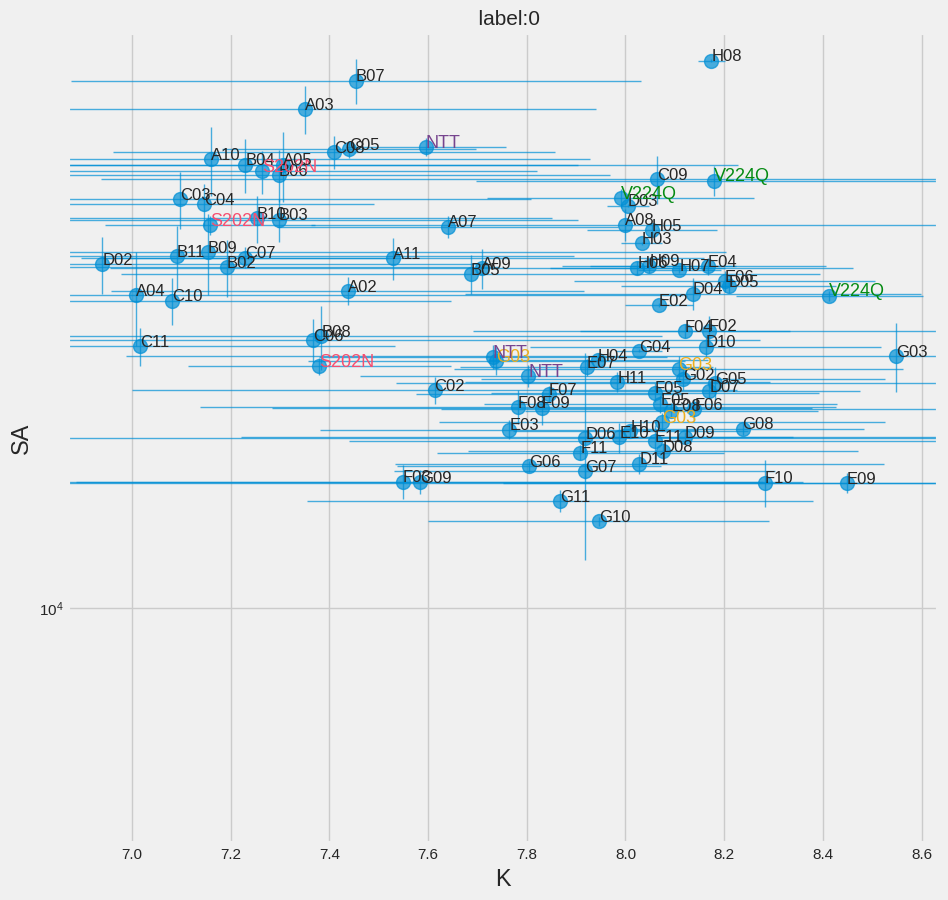

In [122]:
f = ph_an.plot_ebar(0)

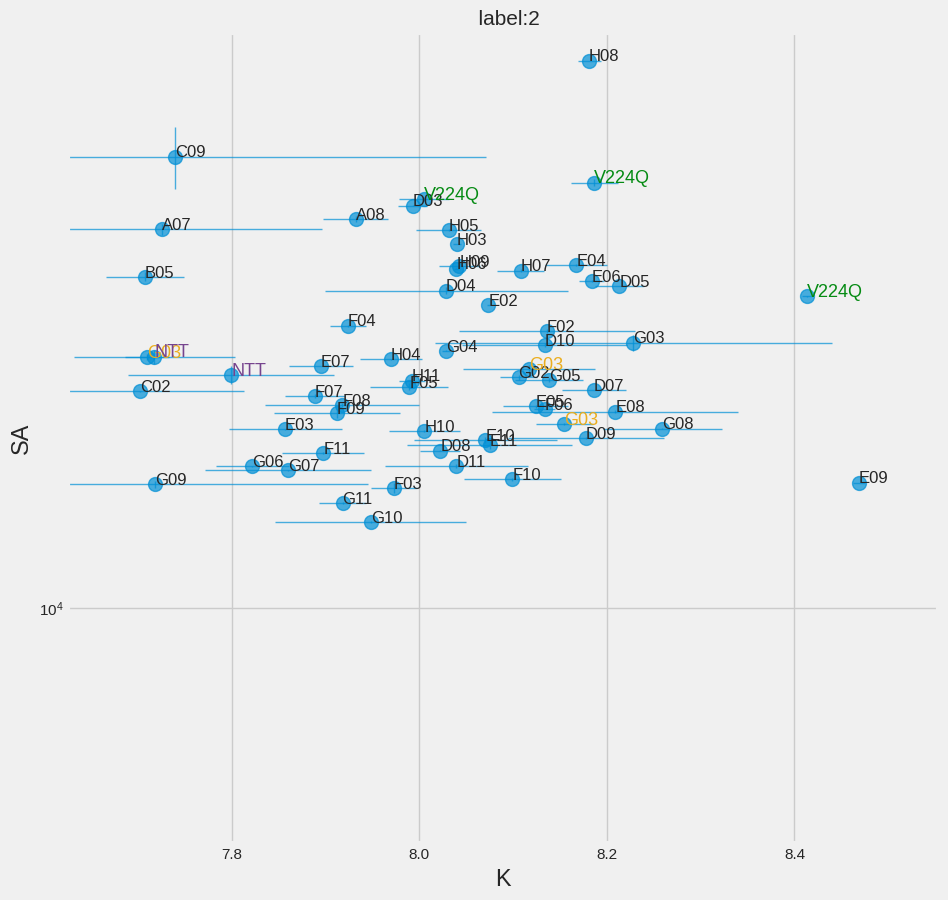

In [123]:
f = ph_an.plot_ebar(2, xmin=7.7, ymin=25)

/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

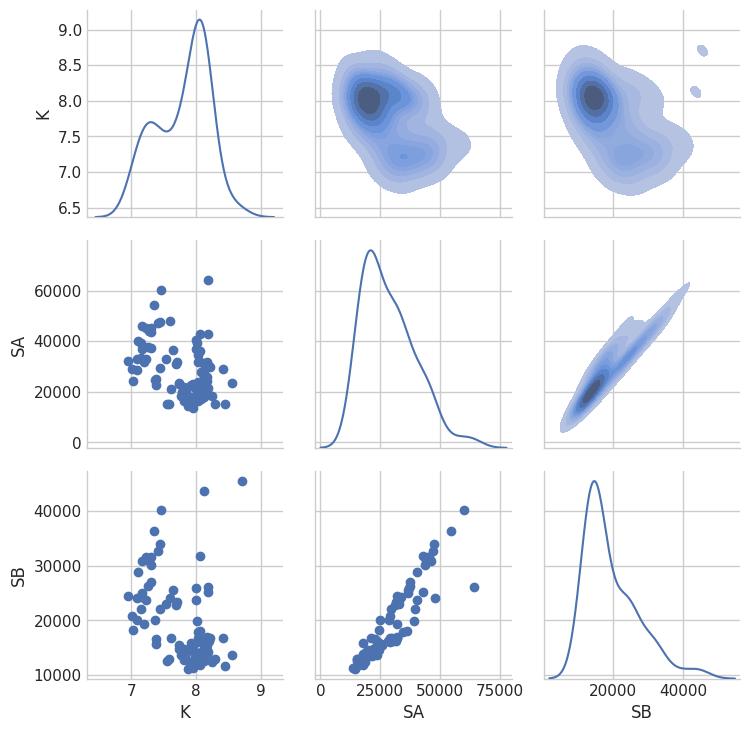

In [124]:
import seaborn as sb

sb.set_style("whitegrid")
g = sb.PairGrid(
    ph_an.fittings[0],
    x_vars=["K", "SA", "SB"],
    y_vars=["K", "SA", "SB"],
    # hue='SB',
    palette="Blues",
    diag_sharey=False,
)

g.map_lower(plt.scatter)
g.map_upper(sb.kdeplot, fill=True)
g.map_diag(sb.kdeplot)

Fit first (0) and second (1) dataset and global (2).

/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has be

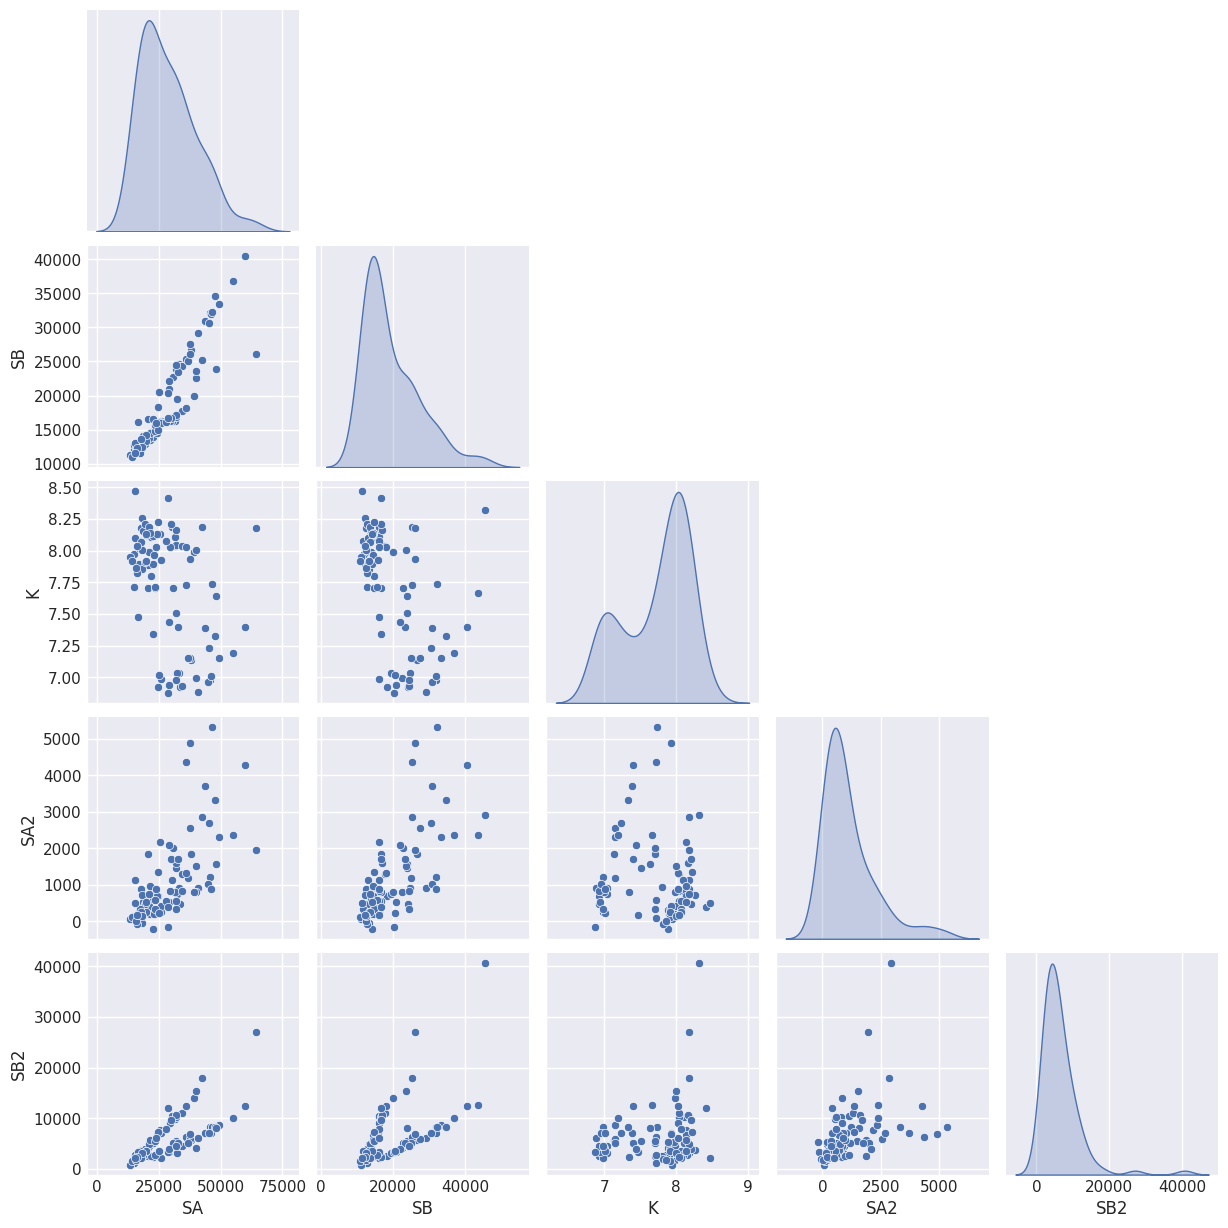

In [125]:
with sb.axes_style("darkgrid"):
    g = sb.pairplot(
        ph_an.fittings[2][["SA", "SB", "K", "SA2", "SB2"]],
        # hue='SB',
        palette="Reds",
        corner=True,
        diag_kind="kde",
    )

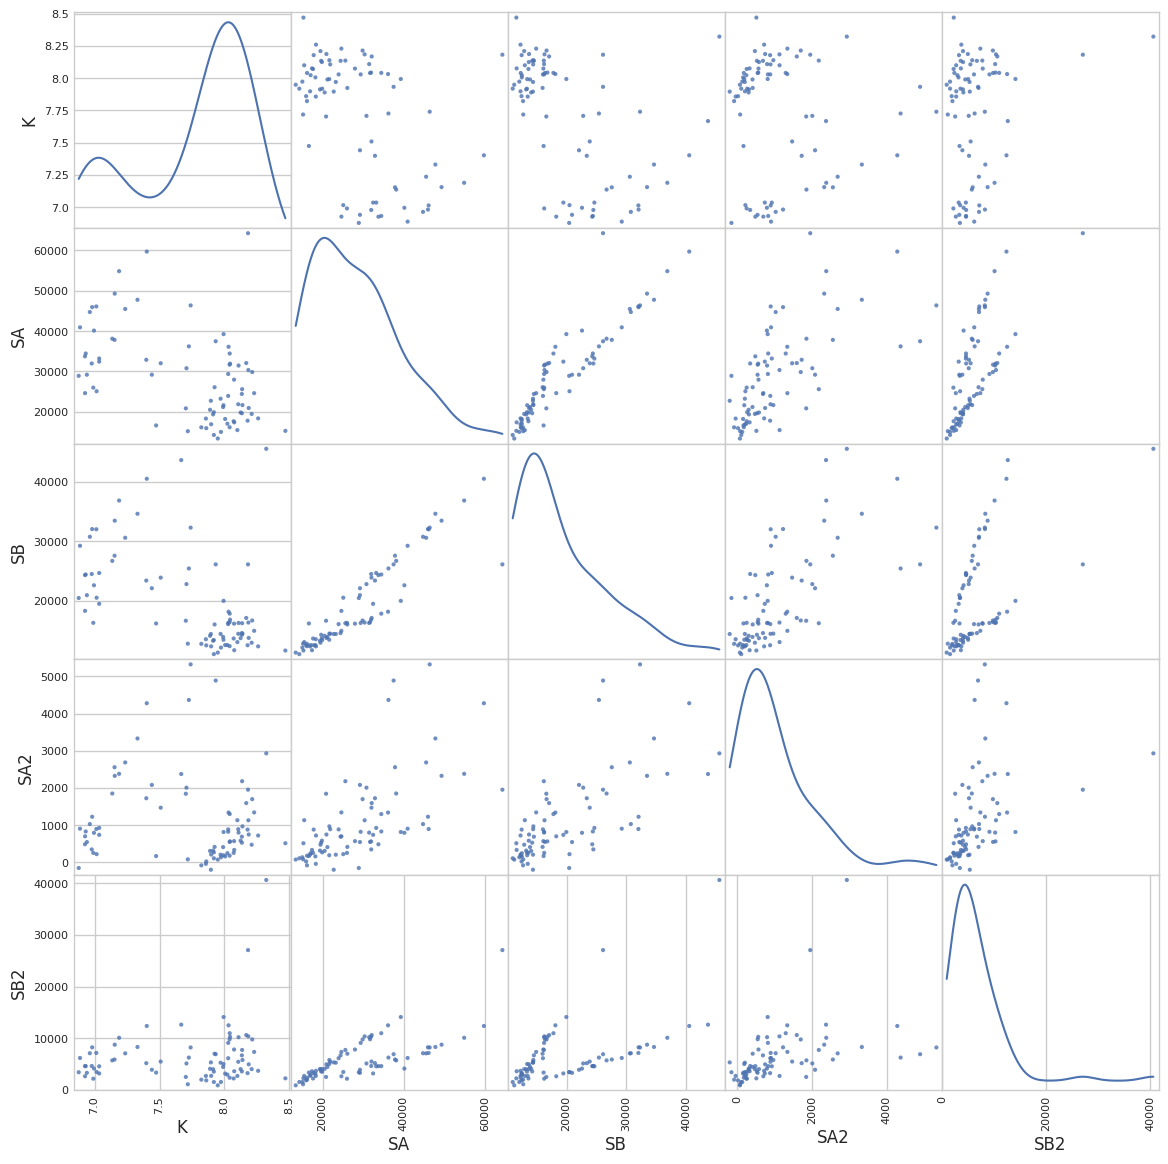

In [126]:
from pandas.plotting import scatter_matrix


def plot_matrix(tit, lb):
    df = tit.fittings[lb].loc[tit.keys_unk]
    try:
        f = scatter_matrix(
            df[["K", "SA", "SB", "SA2", "SB2"]],
            figsize=(14, 14),
            diagonal="kde",
            alpha=0.8,
        )
    except KeyError:
        f = scatter_matrix(
            df[["K", "SA", "SB"]], figsize=(10, 10), diagonal="kde", alpha=0.8
        )
    return f


f = plot_matrix(ph_an, 2)

### combining

In [127]:
res_unk = ph_an.fittings[1].loc[ph_an.keys_unk].sort_index()
res_unk["well"] = res_unk.index

<Figure size 2400x1400 with 0 Axes>

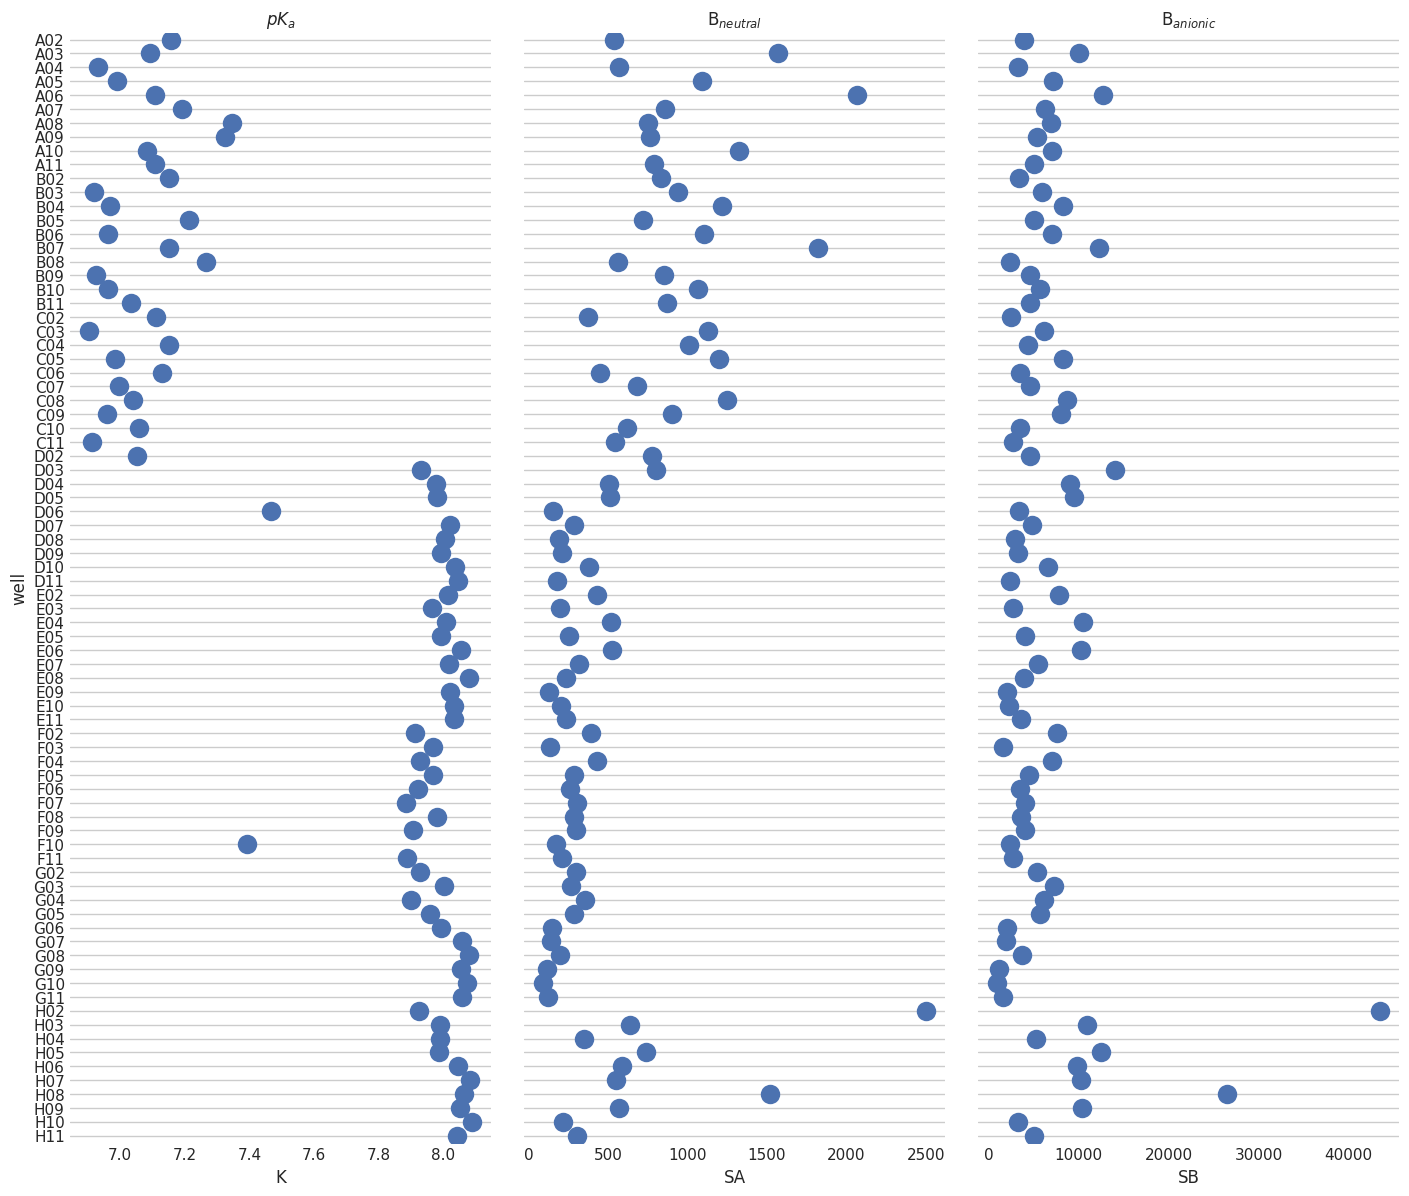

In [128]:
# g = sns.FacetGrid(data=res2, row='well',  margin_titles=True)
# g.map(plt.errorbar, 'K', range(1), xerr='sK', palette='Oranges_d') # x, y,
f = plt.figure(figsize=(24, 14))

# Make the PairGrid
g = sb.PairGrid(
    res_unk,
    x_vars=["K", "SA", "SB"],
    y_vars="well",
    height=12,
    aspect=0.4,
)


# Draw a dot plot using the stripplot function
g.map(sb.stripplot, size=14, orient="h", palette="Set2", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
# g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["$pK_a$", "B$_{neutral}$", "B$_{anionic}$"]


for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sb.despine(left=True, bottom=True)